# HSIC Lasso API exploration

In this notebook, I'll explore the API of
[pyHSICLasso](https://github.com/riken-aip/pyHSICLasso), to learn how to use it
on some test data.

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

from pyHSICLasso import HSICLasso

## Genotype and phenotype generation

First, I generate some test data that would look like the data we plan to use in
the end. Note that the feature matrix it is very sparse (81% of zeros) and contains
only 3 possible values (0, 1 or 2).

In [2]:
ncol = 500
nsample = 1000
coeffs = np.array([0.2, 0.1, 0.3, 0.8])

rng = np.random.default_rng(12345)
X = rng.choice(a=[0, 1, 2], p=[0.81, 0.18, 0.01], replace=True, size=(nsample, ncol))
yint = X[:, : len(coeffs)] @ coeffs
p1 = sp.expit(yint - np.mean(yint))
Y = rng.binomial(1, p1)

## HSIC Lasso model fitting (default parameters)

Here I try fitting HSIC lasso using the default parameters (so using block HSIC
lasso, `B=20` and `M=3`), and check if it finds the active features.

In [3]:
def plot_features(hsic_lasso):
    feats = hsic_lasso.get_index()
    scores = hsic_lasso.get_index_score()

    _, ax = plt.subplots(figsize=(12, 5))
    ax.plot(scores, "o")
    ax.grid(True)
    ax.set_xticks(range(len(feats)))
    ax.set_xticklabels(feats)
    ax.set_ylabel("feature score")
    ax.set_xlabel("feature index")

    return ax

In [4]:
hsic_lasso = HSICLasso()
hsic_lasso.input(X, Y)
_ = hsic_lasso.classification(num_feat=10)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


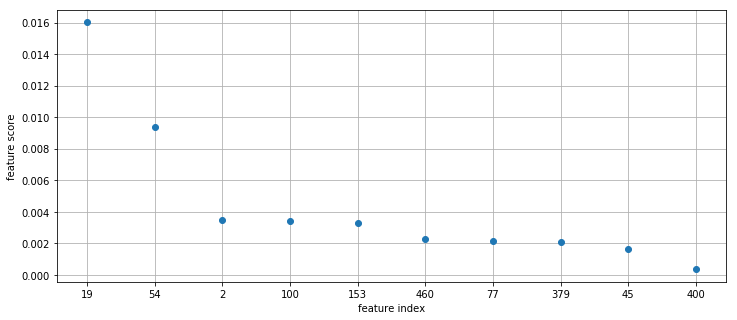

In [5]:
_ = plot_features(hsic_lasso)

In [6]:
hsic_lasso.dump()

============================================== HSICLasso : Result ==================================================
| Order | Feature      | Score | Top-5 Related Feature (Relatedness Score)                                          |
| 1     | 20           | 1.000 | 347          (0.088), 182          (0.088), 129          (0.078), 363          (0.078), 485          (0.078)|
| 2     | 55           | 0.587 | 355          (0.078), 163          (0.078), 299          (0.078), 229          (0.077), 497          (0.077)|
| 3     | 3            | 0.216 | 343          (0.082), 297          (0.081), 409          (0.079), 34           (0.078), 192          (0.078)|
| 4     | 101          | 0.215 | 217          (0.082), 270          (0.082), 110          (0.081), 419          (0.079), 43           (0.078)|
| 5     | 154          | 0.205 | 116          (0.084), 192          (0.081), 131          (0.080), 354          (0.080), 243          (0.077)|
| 6     | 461          | 0.143 | 214          (0.0

## Vanilla HSIC Lasso (no block)

For comparison purpose, I also try the vanilla HSIC lasso, i.e. without blocks.

In [7]:
hsic_lasso = HSICLasso()
hsic_lasso.input(X, Y)
_ = hsic_lasso.classification(num_feat=10, B=nsample, M=1)

Block HSIC Lasso B = 1000.
M set to 1.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


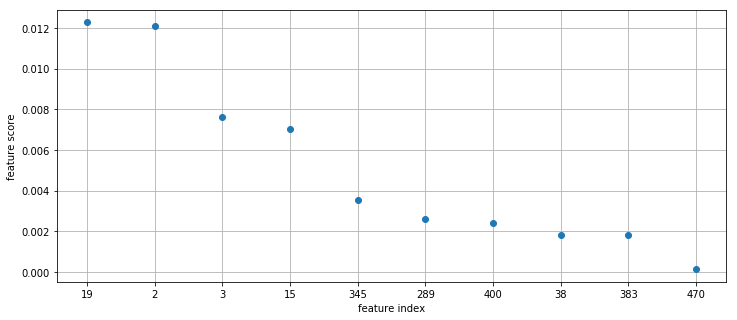

In [8]:
_ = plot_features(hsic_lasso)

In [9]:
hsic_lasso.dump()

============================================== HSICLasso : Result ==================================================
| Order | Feature      | Score | Top-5 Related Feature (Relatedness Score)                                          |
| 1     | 20           | 1.000 | 347          (0.013), 182          (0.010), 221          (0.009), 285          (0.009), 130          (0.009)|
| 2     | 3            | 0.987 | 356          (0.011), 451          (0.009), 34           (0.008), 38           (0.008), 297          (0.008)|
| 3     | 4            | 0.620 | 19           (0.010), 144          (0.009), 383          (0.009), 305          (0.008), 332          (0.007)|
| 4     | 16           | 0.574 | 446          (0.013), 78           (0.008), 499          (0.008), 159          (0.008), 336          (0.007)|
| 5     | 346          | 0.290 | 200          (0.010), 356          (0.009), 424          (0.007), 330          (0.007), 83           (0.006)|
| 6     | 290          | 0.215 | 164          (0.0